In [12]:
#Загрузка библиотек
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Пути к файлам
excel_path = '/content/kanclerisms_labeled.xlsx'
html_path = '/content/template.html'

# Загружаем Excel с канцеляризмами и метками
df = pd.read_excel(excel_path)

In [10]:
#Создаем х и y
X = df['phrase'].astype(str)
y = df['label'].astype(str)

# Делим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1616)

# Преобразуем текст в числовые векторы TF-IDF
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

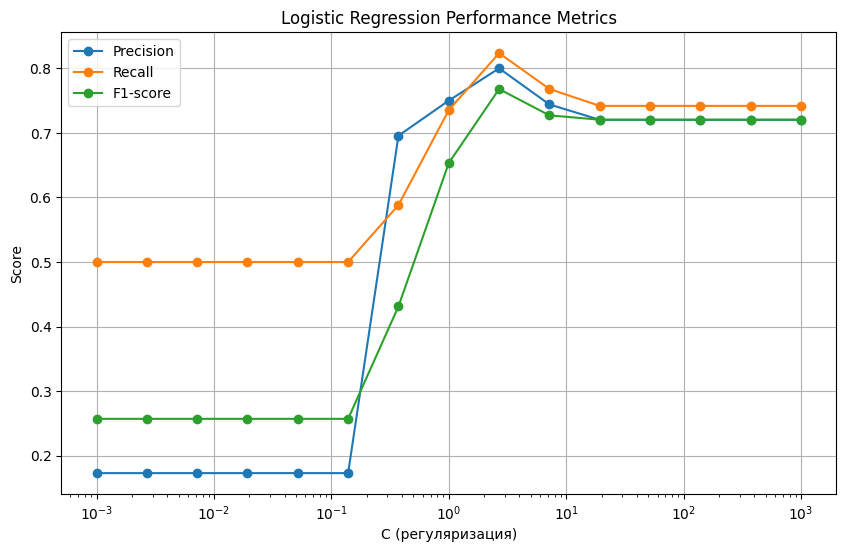

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Диапазон значений регуляризации C
# чем больше C, тем слабее регуляризация
C_values = np.logspace(-3, 3, 15)  # от 0.001 до 1000 (15 точек)

# --- Результаты ---
logreg_results = {
    'C': C_values,
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

#Обучение модели на разных C
for C in C_values:
    clf = LogisticRegression(C=C, max_iter=500, solver='liblinear', random_state=1630)
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    logreg_results['accuracy'].append(accuracy_score(y_test, y_pred))
    logreg_results['precision'].append(precision_score(y_test, y_pred, average='macro'))
    logreg_results['recall'].append(recall_score(y_test, y_pred, average='macro'))
    logreg_results['f1'].append(f1_score(y_test, y_pred, average='macro'))

#Построение графика
plt.figure(figsize=(10, 6))
plt.plot(logreg_results['C'], logreg_results['precision'], label='Precision', marker='o')
plt.plot(logreg_results['C'], logreg_results['recall'], label='Recall', marker='o')
plt.plot(logreg_results['C'], logreg_results['f1'], label='F1-score', marker='o')
plt.xscale('log')  # логарифмическая шкала — удобно для C
plt.xlabel('C (регуляризация)')
plt.ylabel('Score')
plt.title('Logistic Regression Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()

#Лучший результат примерно с= 1.5